# Notebook

## Imports

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.impute import SimpleImputer
import numpy as np

In [119]:
# Reading in data
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
dfs = []
for year in years:
    df = pd.read_csv(f'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_{year}.csv')
    df['year'] = year
    dfs.append(df)
match_df = pd.concat(dfs)

## Data Exploration

In [120]:
match_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
0,2016-M020,Brisbane,Hard,32,A,20160104,271,105062,NaN,NaN,Mikhail Kukushkin,R,183.0,KAZ,28.0,104797,NaN,NaN,Denis Istomin,R,188.0,UZB,29.3,6-2 7-5,3,R32,84.0,1.0,3.0,67.0,36.0,27.0,20.0,10.0,3.0,3.0,6.0,0.0,53.0,32.0,22.0,12.0,10.0,4.0,7.0,65.0,762.0,61.0,781.0,2016
1,2016-M020,Brisbane,Hard,32,A,20160104,272,103285,NaN,PR,Radek Stepanek,R,185.0,CZE,37.1,105583,NaN,NaN,Dusan Lajovic,R,180.0,SRB,25.5,6-0 6-3,3,R32,67.0,3.0,2.0,48.0,25.0,18.0,16.0,8.0,2.0,2.0,0.0,2.0,46.0,25.0,15.0,8.0,7.0,4.0,8.0,197.0,252.0,76.0,678.0,2016
2,2016-M020,Brisbane,Hard,32,A,20160104,273,106071,7,NaN,Bernard Tomic,R,193.0,AUS,23.2,103917,NaN,NaN,Nicolas Mahut,R,190.0,FRA,33.9,6-4 6-3,3,R32,69.0,8.0,0.0,59.0,34.0,28.0,14.0,10.0,4.0,5.0,4.0,1.0,50.0,29.0,21.0,10.0,9.0,3.0,6.0,18.0,1675.0,71.0,710.0,2016
3,2016-M020,Brisbane,Hard,32,A,20160104,275,104471,NaN,Q,Ivan Dodig,R,183.0,CRO,31.0,117352,NaN,Q,Oliver Anderson,U,NaN,AUS,17.6,6-3 6-2,3,R32,67.0,11.0,2.0,49.0,30.0,24.0,13.0,9.0,0.0,0.0,3.0,1.0,52.0,30.0,22.0,9.0,8.0,3.0,6.0,87.0,636.0,813.0,25.0,2016
4,2016-M020,Brisbane,Hard,32,A,20160104,276,106298,NaN,NaN,Lucas Pouille,R,185.0,FRA,21.8,106415,NaN,Q,Yoshihito Nishioka,L,170.0,JPN,20.2,4-6 6-3 7-5,3,R32,143.0,17.0,2.0,95.0,64.0,53.0,15.0,16.0,2.0,4.0,4.0,3.0,120.0,64.0,42.0,30.0,15.0,12.0,15.0,78.0,672.0,117.0,495.0,2016


In [121]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17675 entries, 0 to 1925
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          17675 non-null  object 
 1   tourney_name        17675 non-null  object 
 2   surface             17675 non-null  object 
 3   draw_size           17675 non-null  int64  
 4   tourney_level       17675 non-null  object 
 5   tourney_date        17675 non-null  int64  
 6   match_num           17675 non-null  int64  
 7   winner_id           17675 non-null  int64  
 8   winner_seed         7464 non-null   object 
 9   winner_entry        2549 non-null   object 
 10  winner_name         17675 non-null  object 
 11  winner_hand         17670 non-null  object 
 12  winner_ht           17527 non-null  float64
 13  winner_ioc          17675 non-null  object 
 14  winner_age          17674 non-null  float64
 15  loser_id            17675 non-null  int64  
 16  loser

## Data Cleaning

### Dropping Columns
The first thing we are going to is drop irrelevant or uneeded columns.

In [122]:
# Tournament id is not going to be helpful with overall predictions but could be for individual tournaments
# Country of origin not needed
# winner_entry and seed are basically same thing so only need one
# score not needed if we know who already won
# hand not really necessary?
match_df = match_df.drop(columns = ['tourney_id', 'tourney_name', 'tourney_level', 'winner_ioc', 'loser_ioc',
                                   'match_num', 'winner_entry', 'loser_entry', 'score', 'winner_hand', 'loser_hand'])

### Dealing with NaN's
We need to clean null values up.

In [123]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17675 entries, 0 to 1925
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   surface             17675 non-null  object 
 1   draw_size           17675 non-null  int64  
 2   tourney_date        17675 non-null  int64  
 3   winner_id           17675 non-null  int64  
 4   winner_seed         7464 non-null   object 
 5   winner_name         17675 non-null  object 
 6   winner_ht           17527 non-null  float64
 7   winner_age          17674 non-null  float64
 8   loser_id            17675 non-null  int64  
 9   loser_seed          4380 non-null   object 
 10  loser_name          17675 non-null  object 
 11  loser_ht            17294 non-null  float64
 12  loser_age           17674 non-null  float64
 13  best_of             17675 non-null  int64  
 14  round               17675 non-null  object 
 15  minutes             17147 non-null  float64
 16  w_ace

In [124]:
# Going to start with winner and loser seed
# nan values are probably players that are not seeded at tournaments
match_df['winner_seed'].unique()

array([nan, 7.0, 6.0, 8.0, 2.0, 4.0, 3.0, 1.0, 5.0, 28.0, 14.0, 9.0, 26.0,
       27.0, 19.0, 15.0, 12.0, 24.0, 29.0, 30.0, 23.0, 13.0, 21.0, 25.0,
       31.0, 18.0, 10.0, 16.0, 32.0, 17.0, 11.0, 22.0, 20.0, 33.0, '1',
       '2', '3', '6', '7', '8', '4', '5', '25', '17', '16', '19', '31',
       'WC', 'Q', '23', '14', '10', '18', '28', '32', '11', '15', '20',
       '26', '27', '24', '9', '13', '12', '33', '29', '30', '21', '22',
       'LL'], dtype=object)

In [125]:
# nr stands for not ranked
match_df['winner_seed'] = match_df['winner_seed'].replace(np.nan, '0').replace('WC', '0').replace(
'LL', '0').replace('Q', '0')

In [126]:
# Replacing loser nulls
match_df['loser_seed'] = match_df['loser_seed'].replace(np.nan, '0').replace('WC', '0').replace(
'LL', '0').replace('Q', '0')

In [127]:
# winner_ht, going to replace with mode
# most atp players are about 6' 1"
match_df['winner_ht'].unique()

array([183., 185., 193., 180., 188., 178., 196., 198., 181., 173., 190.,
       175., 172., 191., 206., 203., 170.,  nan, 189., 174., 208., 186.,
       201., 211., 194., 163.])

In [128]:
replace = match_df['winner_ht'].fillna(match_df['winner_ht'].mode()[0], inplace = True)

In [129]:
replace0 = match_df['loser_ht'].fillna(match_df['winner_ht'].mode()[0], inplace = True)

In [130]:
# Winner and loser age
# one null in each so just fill with mode 
replace2 = match_df['winner_age'].fillna(match_df['winner_age'].mode()[0], inplace = True)

In [131]:
replace3 = match_df['loser_age'].fillna(match_df['loser_age'].mode()[0], inplace = True)

We are going to drop null values for game data. We fill it would be inaccurate to try and fill matches with game data based on measures of central tendency.

In [132]:
match_df = match_df.dropna()

## Converting Datatypes to Numeric
We do not have any nulls now. To compare our columns and make models in the future, we need to get our categorical columns to become numeric

In [133]:
# Surface has 3 values so we are going to encode it
match_df["surface"] = match_df["surface"].astype('category')
match_df.dtypes
match_df["surface_cat"] = match_df["surface"].cat.codes

Now, since we have surface_cats as an int, we no longer need 'surface'

In [134]:
match_df = match_df.drop(columns = 'surface')

Next, we are going to change winner and loser seeds to integers

In [135]:
match_df['winner_seed'] = match_df['winner_seed'].astype(int)
match_df['loser_seed'] = match_df['loser_seed'].astype(int)

For our round column, we are going to remove 'R' from values such as 'R32'. We are also going to drop 'B' and 'BR' which stand for bye and bye round. We are also going to get rid of matches with 'RR'. This stands for round robin and these matches typically do not affect rankings and are uneeded.

In [136]:
match_df = match_df.loc[match_df['round'] != 'RR']
match_df = match_df.loc[match_df['round'] != 'B']
match_df = match_df.loc[match_df['round'] != 'BR']

In [137]:
match_df['round'] = match_df['round'].str.replace('R', '')

In [138]:
match_df['round'].unique()

array(['32', '16', 'QF', 'SF', 'F', '128', '64'], dtype=object)

The last thing we are doing for round is replacing QF, F, and SF with the number of players in those rounds.

In [139]:
match_df['round'] = match_df['round'].str.replace('QF', '8').replace('SF', '4').replace('F', '2')

In [140]:
match_df['round'] = match_df['round'].astype(int)

In [141]:
match_df = match_df.reset_index(drop=True)

## Creating fav_win column

This column will allow us to see if the favorite won the match or not.

In [142]:
winners_r = match_df['winner_rank']
losers_r = match_df['loser_rank']
winners_r

0         65.0
1        197.0
2         18.0
3         87.0
4         78.0
         ...  
15760    151.0
15761    136.0
15762     38.0
15763     86.0
15764     59.0
Name: winner_rank, Length: 15765, dtype: float64

In [143]:
favorites = []
for i in list(range(0, 15765)):
    if winners_r[i] > losers_r[i]:             
        favorites.append(False)
    elif winners_r[i] < losers_r[i]:
        favorites.append(True)
favorites

[False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 T

In [144]:
match_df['fav_win'] = favorites

In [145]:
match_df['fav_win'].value_counts()

True     10064
False     5701
Name: fav_win, dtype: int64

In [146]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15765 entries, 0 to 15764
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   draw_size           15765 non-null  int64  
 1   tourney_date        15765 non-null  int64  
 2   winner_id           15765 non-null  int64  
 3   winner_seed         15765 non-null  int32  
 4   winner_name         15765 non-null  object 
 5   winner_ht           15765 non-null  float64
 6   winner_age          15765 non-null  float64
 7   loser_id            15765 non-null  int64  
 8   loser_seed          15765 non-null  int32  
 9   loser_name          15765 non-null  object 
 10  loser_ht            15765 non-null  float64
 11  loser_age           15765 non-null  float64
 12  best_of             15765 non-null  int64  
 13  round               15765 non-null  int32  
 14  minutes             15765 non-null  float64
 15  w_ace               15765 non-null  float64
 16  w_df

## Train-Test Split

In [147]:
X_train.head()

,draw_size,tourney_date,winner_id,winner_name,winner_ht,winner_age,loser_id,loser_name,loser_ht,loser_age,best_of,round,winner_rank,loser_rank,year_match,surface_cat,prev_year,year_winner,w_df_winner,w_svpt_winner,w_1stIn_winner,w_1stWon_winner,w_2ndWon_winner,w_SvGms_winner,w_bpSaved_winner,w_bpFaced_winner,w_ace_winner,l_ace_loser,l_df_loser,l_svpt_loser,l_1stIn_loser,l_1stWon_loser,l_2ndWon_loser,l_SvGms_loser,l_bpSaved_loser,l_bpFaced_loser
1599,64,2018-04-16,126774,Stefanos Tsitsipas,193.0,19.6,133430,Denis Shapovalov,185.0,19.0,3,64,71.0,45.0,2018,1,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4684,32,2018-04-30,106121,Taro Daniel,191.0,25.2,104297,Rogerio Dutra Silva,178.0,34.2,3,8,114.0,121.0,2018,1,2017,2017.0,1.333333,87.00,64.333333,44.00,13.333333,14.00,4.333333,6.666667,2.666667,3.4,4.10,72.10,41.00,28.2,14.8,10.7,4.60,7.90
1385,32,2016-02-01,104180,Gilles Muller,193.0,32.7,104291,Malek Jaziri,185.0,32.0,3,32,42.0,122.0,2016,3,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9020,32,2021-03-08,208029,Holger Rune,185.0,17.8,202104,Sebastian Baez,170.0,20.1,3,32,410.0,257.0,2021,1,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9033,128,2017-01-16,106058,Jack Sock,185.0,24.3,111575,Karen Khachanov,198.0,20.6,5,64,20.0,52.0,2017,3,2016,2016.0,3.650000,72.75,43.650000,34.05,16.650000,12.45,2.350000,3.900000,7.550000,12.5,4.75,98.75,61.25,47.5,17.0,15.5,5.25,8.25


In [148]:
test_df = match_df.loc[match_df['year_match'] >= 2021]

KeyError: 'year_match'

In [ ]:
len(test_df)/len(match_df)

In [ ]:
X = match_df.drop(columns='fav_win')
y = match_df['fav_win']
# Preparing our hold out data for train test split
X_cols = X.columns
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, test_size=len(test_df))
X_test, X_hold, y_test, y_hold = train_test_split(X_test, y_test, test_size=500, shuffle=False)

## Gathering Player Averages

By gathering player's averages, we will be able to play to predict future years.

In [ ]:
X_train['tourney_date'] = pd.to_datetime(X_train['tourney_date'], format='%Y%m%d')

In [ ]:
X_train['prev_year'] = X_train['tourney_date'].dt.year - 1

In [ ]:
match_df

In [ ]:
match_df.info()

In [ ]:
X_train.columns

In [ ]:
X_trainW = X_train.groupby(['winner_id', 'year', 'surface_cat']).mean()[['w_df',             
'w_svpt',             
   'w_1stIn',            
   'w_1stWon',           
   'w_2ndWon',           
'w_SvGms',            
  'w_bpSaved',          
  'w_bpFaced',
                                                'w_ace'
    ]]

In [ ]:
X_trainW = X_trainW.reset_index()

In [42]:
X_trainL = X_train.groupby(['loser_id', 'year', 'surface_cat']).mean()[['l_ace',              
  'l_df',               
  'l_svpt',             
  'l_1stIn',            
 'l_1stWon',           
  'l_2ndWon',           
  'l_SvGms',            
 'l_bpSaved',          
  'l_bpFaced',
    ]]

In [43]:
match_df = X_train.merge(X_trainW, 
              left_on = ['winner_id', 'prev_year', 'surface_cat'], 
              right_on = ['winner_id', 'year', 'surface_cat'],
              suffixes = ('_match', '_winner'),
              how = 'left')

In [44]:
match_df = match_df.merge(X_trainL, 
              left_on = ['loser_id', 'prev_year', 'surface_cat'], 
              right_on = ['loser_id', 'year', 'surface_cat'],
              suffixes = ('_match', '_loser'),
              how = 'left')

In [45]:
# drop columns 
# base on favorite 

In [46]:
match_df.columns

Index(['draw_size', 'tourney_date', 'winner_id', 'winner_seed', 'winner_name',
       'winner_ht', 'winner_age', 'loser_id', 'loser_seed', 'loser_name',
       'loser_ht', 'loser_age', 'best_of', 'round', 'minutes', 'w_ace_match',
       'w_df_match', 'w_svpt_match', 'w_1stIn_match', 'w_1stWon_match',
       'w_2ndWon_match', 'w_SvGms_match', 'w_bpSaved_match', 'w_bpFaced_match',
       'l_ace_match', 'l_df_match', 'l_svpt_match', 'l_1stIn_match',
       'l_1stWon_match', 'l_2ndWon_match', 'l_SvGms_match', 'l_bpSaved_match',
       'l_bpFaced_match', 'winner_rank', 'winner_rank_points', 'loser_rank',
       'loser_rank_points', 'year_match', 'surface_cat', 'prev_year',
       'year_winner', 'w_df_winner', 'w_svpt_winner', 'w_1stIn_winner',
       'w_1stWon_winner', 'w_2ndWon_winner', 'w_SvGms_winner',
       'w_bpSaved_winner', 'w_bpFaced_winner', 'w_ace_winner', 'l_ace_loser',
       'l_df_loser', 'l_svpt_loser', 'l_1stIn_loser', 'l_1stWon_loser',
       'l_2ndWon_loser', 'l_SvGms_los

These columns are not needed

In [47]:
match_df = match_df.drop(columns = ['w_ace_match',
       'w_df_match', 'w_svpt_match', 'w_1stIn_match', 'w_1stWon_match',
       'w_2ndWon_match', 'w_SvGms_match', 'w_bpSaved_match', 'w_bpFaced_match',
       'l_ace_match', 'l_df_match', 'l_svpt_match', 'l_1stIn_match',
       'l_1stWon_match', 'l_2ndWon_match', 'l_SvGms_match', 'l_bpSaved_match',
       'l_bpFaced_match', ])

Here we are going to instantiate a simple imputer to make nulls values into 0's. Our null values are coming from players that did not play the year before.

In [48]:
match_df.columns

Index(['draw_size', 'tourney_date', 'winner_id', 'winner_seed', 'winner_name',
       'winner_ht', 'winner_age', 'loser_id', 'loser_seed', 'loser_name',
       'loser_ht', 'loser_age', 'best_of', 'round', 'minutes', 'winner_rank',
       'winner_rank_points', 'loser_rank', 'loser_rank_points', 'year_match',
       'surface_cat', 'prev_year', 'year_winner', 'w_df_winner',
       'w_svpt_winner', 'w_1stIn_winner', 'w_1stWon_winner', 'w_2ndWon_winner',
       'w_SvGms_winner', 'w_bpSaved_winner', 'w_bpFaced_winner',
       'w_ace_winner', 'l_ace_loser', 'l_df_loser', 'l_svpt_loser',
       'l_1stIn_loser', 'l_1stWon_loser', 'l_2ndWon_loser', 'l_SvGms_loser',
       'l_bpSaved_loser', 'l_bpFaced_loser'],
      dtype='object')

In [49]:
X_cols

Index(['draw_size', 'tourney_date', 'winner_id', 'winner_seed', 'winner_name',
       'winner_ht', 'winner_age', 'loser_id', 'loser_seed', 'loser_name',
       'loser_ht', 'loser_age', 'best_of', 'round', 'minutes', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
       'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
       'winner_rank_points', 'loser_rank', 'loser_rank_points', 'year',
       'surface_cat'],
      dtype='object')

In [50]:
[col for col in match_df.columns if 'l_' in col]

['l_ace_loser',
 'l_df_loser',
 'l_svpt_loser',
 'l_1stIn_loser',
 'l_1stWon_loser',
 'l_2ndWon_loser',
 'l_SvGms_loser',
 'l_bpSaved_loser',
 'l_bpFaced_loser']

differences = []
for idx, row in match_df.iterrows():
    # if fav_win in row is True
    if row['fav_win'] == True:
        # difference is winner - loser
        row['w_ace_winner'] - row['l_ace_loser']
        
    
when favwin = true
winner - loser 
when favwin = false
loser - winner

In [51]:
pd.set_option('display.max_columns', None)
match_df.head()

,draw_size,tourney_date,winner_id,winner_seed,winner_name,winner_ht,winner_age,loser_id,loser_seed,loser_name,loser_ht,loser_age,best_of,round,minutes,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year_match,surface_cat,prev_year,year_winner,w_df_winner,w_svpt_winner,w_1stIn_winner,w_1stWon_winner,w_2ndWon_winner,w_SvGms_winner,w_bpSaved_winner,w_bpFaced_winner,w_ace_winner,l_ace_loser,l_df_loser,l_svpt_loser,l_1stIn_loser,l_1stWon_loser,l_2ndWon_loser,l_SvGms_loser,l_bpSaved_loser,l_bpFaced_loser
0,128,2022-06-27,206909,0,Brandon Nakashima,185.0,20.8,200095,0,Nicola Kuhn,185.0,22.2,5,128,150.0,56.0,969.0,261.0,200.0,2022,2,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,60.0,31.0,23.0,12.0,9.0,1.0,4.0
1,32,2019-02-18,104655,0,Pablo Cuevas,180.0,33.1,106228,0,Juan Ignacio Londero,180.0,25.5,3,16,68.0,63.0,751.0,69.0,739.0,2019,1,2018,2018.0,1.250000,60.250000,41.000000,33.750000,13.000000,11.500000,0.500000,1.000000,6.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32,2017-10-02,100644,2,Alexander Zverev,198.0,20.4,126094,0,Andrey Rublev,188.0,19.9,3,8,70.0,4.0,4310.0,39.0,1182.0,2017,3,2016,2016.0,3.761905,77.238095,48.666667,36.333333,15.761905,12.047619,3.476190,4.761905,6.666667,3.0,3.5,72.5,41.5,31.0,14.0,12.0,2.0,5.0
3,32,2016-09-26,106233,1,Dominic Thiem,185.0,23.0,105842,0,Di Wu,175.0,25.0,3,16,67.0,10.0,3295.0,193.0,290.0,2016,3,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,2019-04-08,105992,0,Ryan Harrison,183.0,26.9,103333,0,Ivo Karlovic,208.0,40.1,3,32,57.0,107.0,545.0,77.0,709.0,2019,1,2018,2018.0,2.000000,68.666667,44.333333,35.000000,12.333333,10.333333,1.666667,2.333333,10.333333,18.2,3.2,85.4,56.4,46.6,16.4,14.6,3.0,4.6


In [52]:
winners_r = match_df['winner_rank']

In [53]:
losers_r = match_df['loser_rank']

In [56]:
favorites = []
for i in list(range(0, 11823)):
    if winners_r[i] > losers_r[i]:             
        favorites.append(False)
    elif winners_r[i] < losers_r[i]:
        favorites.append(True)
favorites

[True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,

In [57]:
match_df['fav_win'] = favorites

In [58]:
match_df.columns

Index(['draw_size', 'tourney_date', 'winner_id', 'winner_seed', 'winner_name',
       'winner_ht', 'winner_age', 'loser_id', 'loser_seed', 'loser_name',
       'loser_ht', 'loser_age', 'best_of', 'round', 'minutes', 'winner_rank',
       'winner_rank_points', 'loser_rank', 'loser_rank_points', 'year_match',
       'surface_cat', 'prev_year', 'year_winner', 'w_df_winner',
       'w_svpt_winner', 'w_1stIn_winner', 'w_1stWon_winner', 'w_2ndWon_winner',
       'w_SvGms_winner', 'w_bpSaved_winner', 'w_bpFaced_winner',
       'w_ace_winner', 'l_ace_loser', 'l_df_loser', 'l_svpt_loser',
       'l_1stIn_loser', 'l_1stWon_loser', 'l_2ndWon_loser', 'l_SvGms_loser',
       'l_bpSaved_loser', 'l_bpFaced_loser', 'fav_win'],
      dtype='object')

In [59]:
match_df = match_df.drop(columns = ['winner_seed', 'loser_seed', 'winner_rank_points', 'loser_rank_points', 'minutes'])

In [60]:
match_df.isna().sum()

draw_size              0
tourney_date           0
winner_id              0
winner_name            0
winner_ht              0
winner_age             0
loser_id               0
loser_name             0
loser_ht               0
loser_age              0
best_of                0
round                  0
winner_rank            0
loser_rank             0
year_match             0
surface_cat            0
prev_year              0
year_winner         3613
w_df_winner         3613
w_svpt_winner       3613
w_1stIn_winner      3613
w_1stWon_winner     3613
w_2ndWon_winner     3613
w_SvGms_winner      3613
w_bpSaved_winner    3613
w_bpFaced_winner    3613
w_ace_winner        3613
l_ace_loser         3586
l_df_loser          3586
l_svpt_loser        3586
l_1stIn_loser       3586
l_1stWon_loser      3586
l_2ndWon_loser      3586
l_SvGms_loser       3586
l_bpSaved_loser     3586
l_bpFaced_loser     3586
fav_win                0
dtype: int64

In [61]:
fav_win_T = match_df.loc[match_df['fav_win'] == True]

In [62]:
fav_win_T.isna().sum()

draw_size              0
tourney_date           0
winner_id              0
winner_name            0
winner_ht              0
winner_age             0
loser_id               0
loser_name             0
loser_ht               0
loser_age              0
best_of                0
round                  0
winner_rank            0
loser_rank             0
year_match             0
surface_cat            0
prev_year              0
year_winner         1990
w_df_winner         1990
w_svpt_winner       1990
w_1stIn_winner      1990
w_1stWon_winner     1990
w_2ndWon_winner     1990
w_SvGms_winner      1990
w_bpSaved_winner    1990
w_bpFaced_winner    1990
w_ace_winner        1990
l_ace_loser         2601
l_df_loser          2601
l_svpt_loser        2601
l_1stIn_loser       2601
l_1stWon_loser      2601
l_2ndWon_loser      2601
l_SvGms_loser       2601
l_bpSaved_loser     2601
l_bpFaced_loser     2601
fav_win                0
dtype: int64

In [63]:
fav_win_T.columns

Index(['draw_size', 'tourney_date', 'winner_id', 'winner_name', 'winner_ht',
       'winner_age', 'loser_id', 'loser_name', 'loser_ht', 'loser_age',
       'best_of', 'round', 'winner_rank', 'loser_rank', 'year_match',
       'surface_cat', 'prev_year', 'year_winner', 'w_df_winner',
       'w_svpt_winner', 'w_1stIn_winner', 'w_1stWon_winner', 'w_2ndWon_winner',
       'w_SvGms_winner', 'w_bpSaved_winner', 'w_bpFaced_winner',
       'w_ace_winner', 'l_ace_loser', 'l_df_loser', 'l_svpt_loser',
       'l_1stIn_loser', 'l_1stWon_loser', 'l_2ndWon_loser', 'l_SvGms_loser',
       'l_bpSaved_loser', 'l_bpFaced_loser', 'fav_win'],
      dtype='object')

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
fav_win_T['fav_rank_diff'] = fav_win_T['winner_rank'] - fav_win_T['loser_rank']
fav_win_T['fav_bpFaced_diff'] = fav_win_T['w_bpFaced_winner'] - fav_win_T['l_bpFaced_loser']
fav_win_T['fav_bpSaved_diff'] = fav_win_T['w_bpSaved_winner'] - fav_win_T['l_bpSaved_loser']
fav_win_T['fav_SvGms_diff'] = fav_win_T['w_SvGms_winner'] - fav_win_T['l_SvGms_loser']
fav_win_T['fav_2ndWon_diff'] = fav_win_T['w_2ndWon_winner'] - fav_win_T['l_2ndWon_loser']
fav_win_T['fav_1stWon_diff'] = fav_win_T['w_1stWon_winner'] - fav_win_T['l_1stWon_loser']
fav_win_T['fav_1stIn_diff'] = fav_win_T['w_1stIn_winner'] - fav_win_T['l_1stIn_loser']
fav_win_T['fav_svpt_diff'] = fav_win_T['w_svpt_winner'] - fav_win_T['l_svpt_loser']
fav_win_T['fav_df_diff'] = fav_win_T['w_df_winner'] - fav_win_T['l_df_loser']
fav_win_T['fav_ace_diff'] = fav_win_T['w_ace_winner'] - fav_win_T['l_ace_loser']
fav_win_T['fav_age_diff'] = fav_win_T['winner_age'] - fav_win_T['loser_age']
fav_win_T['fav_ht_diff'] = fav_win_T['winner_ht'] - fav_win_T['loser_ht']

In [66]:
# dropping not diff columns
fav_win_T = fav_win_T.drop(columns = ['w_df_winner',
       'w_svpt_winner', 'w_1stIn_winner', 'w_1stWon_winner', 'w_2ndWon_winner',
       'w_SvGms_winner', 'w_bpSaved_winner', 'w_bpFaced_winner',
       'w_ace_winner', 'l_ace_loser', 'l_df_loser', 'l_svpt_loser',
       'l_1stIn_loser', 'l_1stWon_loser', 'l_2ndWon_loser', 'l_SvGms_loser',
       'l_bpSaved_loser', 'l_bpFaced_loser', 'winner_ht', 'loser_ht', 'winner_age', 'loser_age'])

In [67]:
pd.set_option('display.max_columns', None)

In [68]:
fav_win_T.head()

,draw_size,tourney_date,winner_id,winner_name,loser_id,loser_name,best_of,round,winner_rank,loser_rank,year_match,surface_cat,prev_year,year_winner,fav_win,fav_rank_diff,fav_bpFaced_diff,fav_bpSaved_diff,fav_SvGms_diff,fav_2ndWon_diff,fav_1stWon_diff,fav_1stIn_diff,fav_svpt_diff,fav_df_diff,fav_ace_diff,fav_age_diff,fav_ht_diff
0,128,2022-06-27,206909,Brandon Nakashima,200095,Nicola Kuhn,5,128,56.0,261.0,2022,2,2021,NaN,True,-205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.4,0.0
1,32,2019-02-18,104655,Pablo Cuevas,106228,Juan Ignacio Londero,3,16,63.0,69.0,2019,1,2018,2018.0,True,-6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0
2,32,2017-10-02,100644,Alexander Zverev,126094,Andrey Rublev,3,8,4.0,39.0,2017,3,2016,2016.0,True,-35.0,-0.238095,1.476190,0.047619,1.761905,5.333333,7.166667,4.738095,0.261905,3.666667,0.5,10.0
3,32,2016-09-26,106233,Dominic Thiem,105842,Di Wu,3,16,10.0,193.0,2016,3,2015,NaN,True,-183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,10.0
6,128,2020-01-20,104745,Rafael Nadal,106198,Hugo Dellien,5,128,1.0,73.0,2020,3,2019,2019.0,True,-72.0,-11.350877,-6.035088,-1.385965,7.315789,-4.578947,-25.649123,-19.473684,0.385965,2.649123,7.1,5.0


In [69]:
fav_win_T = fav_win_T.drop(columns = ['year_winner'])

In [70]:
fav_win_T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7581 entries, 0 to 11822
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   draw_size         7581 non-null   int64         
 1   tourney_date      7581 non-null   datetime64[ns]
 2   winner_id         7581 non-null   int64         
 3   winner_name       7581 non-null   object        
 4   loser_id          7581 non-null   int64         
 5   loser_name        7581 non-null   object        
 6   best_of           7581 non-null   int64         
 7   round             7581 non-null   int32         
 8   winner_rank       7581 non-null   float64       
 9   loser_rank        7581 non-null   float64       
 10  year_match        7581 non-null   int64         
 11  surface_cat       7581 non-null   int8          
 12  prev_year         7581 non-null   int64         
 13  fav_win           7581 non-null   bool          
 14  fav_rank_diff     7581 

In [71]:
fav_win_F = match_df.loc[match_df['fav_win'] == False]

In [72]:
fav_win_F.columns

Index(['draw_size', 'tourney_date', 'winner_id', 'winner_name', 'winner_ht',
       'winner_age', 'loser_id', 'loser_name', 'loser_ht', 'loser_age',
       'best_of', 'round', 'winner_rank', 'loser_rank', 'year_match',
       'surface_cat', 'prev_year', 'year_winner', 'w_df_winner',
       'w_svpt_winner', 'w_1stIn_winner', 'w_1stWon_winner', 'w_2ndWon_winner',
       'w_SvGms_winner', 'w_bpSaved_winner', 'w_bpFaced_winner',
       'w_ace_winner', 'l_ace_loser', 'l_df_loser', 'l_svpt_loser',
       'l_1stIn_loser', 'l_1stWon_loser', 'l_2ndWon_loser', 'l_SvGms_loser',
       'l_bpSaved_loser', 'l_bpFaced_loser', 'fav_win'],
      dtype='object')

In [73]:
fav_win_F['fav_rank_diff'] =fav_win_F['loser_rank'] - fav_win_F['winner_rank'] 
fav_win_F['fav_bpFaced_diff'] =fav_win_F['l_bpFaced_loser'] - fav_win_F['w_bpFaced_winner']  
fav_win_F['fav_bpSaved_diff'] =fav_win_F['l_bpSaved_loser'] - fav_win_F['w_bpSaved_winner']  
fav_win_F['fav_SvGms_diff'] =fav_win_F['l_SvGms_loser'] - fav_win_F['w_SvGms_winner'] 
fav_win_F['fav_2ndWon_diff'] =fav_win_F['l_2ndWon_loser'] - fav_win_F['w_2ndWon_winner']  
fav_win_F['fav_1stWon_diff'] =fav_win_F['l_1stWon_loser'] - fav_win_F['w_1stWon_winner']  
fav_win_F['fav_1stIn_diff'] =fav_win_F['l_1stIn_loser'] - fav_win_F['w_1stIn_winner'] 
fav_win_F['fav_svpt_diff'] =fav_win_F['l_svpt_loser'] - fav_win_F['w_svpt_winner'] 
fav_win_F['fav_df_diff'] =fav_win_F['l_df_loser'] - fav_win_F['w_df_winner']  
fav_win_F['fav_ace_diff'] =fav_win_F['l_ace_loser'] - fav_win_F['w_ace_winner']  
fav_win_F['fav_age_diff'] =fav_win_F['loser_age'] - fav_win_F['winner_age'] 
fav_win_F['fav_ht_diff'] =fav_win_F['loser_ht'] - fav_win_F['winner_ht'] 

In [74]:
fav_win_F = fav_win_F.drop(columns = ['w_df_winner',
       'w_svpt_winner', 'w_1stIn_winner', 'w_1stWon_winner', 'w_2ndWon_winner',
       'w_SvGms_winner', 'w_bpSaved_winner', 'w_bpFaced_winner',
       'w_ace_winner', 'l_ace_loser', 'l_df_loser', 'l_svpt_loser',
       'l_1stIn_loser', 'l_1stWon_loser', 'l_2ndWon_loser', 'l_SvGms_loser',
       'l_bpSaved_loser', 'l_bpFaced_loser', 'winner_ht', 'loser_ht', 'winner_age', 'loser_age'])

In [75]:
fav_win_F = fav_win_F.drop(columns = 'year_winner')

In [76]:
agg_df = pd.concat([fav_win_T, fav_win_F])

In [77]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11823 entries, 0 to 11816
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   draw_size         11823 non-null  int64         
 1   tourney_date      11823 non-null  datetime64[ns]
 2   winner_id         11823 non-null  int64         
 3   winner_name       11823 non-null  object        
 4   loser_id          11823 non-null  int64         
 5   loser_name        11823 non-null  object        
 6   best_of           11823 non-null  int64         
 7   round             11823 non-null  int32         
 8   winner_rank       11823 non-null  float64       
 9   loser_rank        11823 non-null  float64       
 10  year_match        11823 non-null  int64         
 11  surface_cat       11823 non-null  int8          
 12  prev_year         11823 non-null  int64         
 13  fav_win           11823 non-null  bool          
 14  fav_rank_diff     1182

In [78]:
agg_df.head()

,draw_size,tourney_date,winner_id,winner_name,loser_id,loser_name,best_of,round,winner_rank,loser_rank,year_match,surface_cat,prev_year,fav_win,fav_rank_diff,fav_bpFaced_diff,fav_bpSaved_diff,fav_SvGms_diff,fav_2ndWon_diff,fav_1stWon_diff,fav_1stIn_diff,fav_svpt_diff,fav_df_diff,fav_ace_diff,fav_age_diff,fav_ht_diff
0,128,2022-06-27,206909,Brandon Nakashima,200095,Nicola Kuhn,5,128,56.0,261.0,2022,2,2021,True,-205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.4,0.0
1,32,2019-02-18,104655,Pablo Cuevas,106228,Juan Ignacio Londero,3,16,63.0,69.0,2019,1,2018,True,-6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0
2,32,2017-10-02,100644,Alexander Zverev,126094,Andrey Rublev,3,8,4.0,39.0,2017,3,2016,True,-35.0,-0.238095,1.476190,0.047619,1.761905,5.333333,7.166667,4.738095,0.261905,3.666667,0.5,10.0
3,32,2016-09-26,106233,Dominic Thiem,105842,Di Wu,3,16,10.0,193.0,2016,3,2015,True,-183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,10.0
6,128,2020-01-20,104745,Rafael Nadal,106198,Hugo Dellien,5,128,1.0,73.0,2020,3,2019,True,-72.0,-11.350877,-6.035088,-1.385965,7.315789,-4.578947,-25.649123,-19.473684,0.385965,2.649123,7.1,5.0


In [79]:
agg_df.to_csv('MR')

In [80]:
agg_df.isna().sum()

draw_size              0
tourney_date           0
winner_id              0
winner_name            0
loser_id               0
loser_name             0
best_of                0
round                  0
winner_rank            0
loser_rank             0
year_match             0
surface_cat            0
prev_year              0
fav_win                0
fav_rank_diff          0
fav_bpFaced_diff    4709
fav_bpSaved_diff    4709
fav_SvGms_diff      4709
fav_2ndWon_diff     4709
fav_1stWon_diff     4709
fav_1stIn_diff      4709
fav_svpt_diff       4709
fav_df_diff         4709
fav_ace_diff        4709
fav_age_diff           0
fav_ht_diff            0
dtype: int64

## Model-less Baseline

In [81]:
agg_df['fav_win'].value_counts()

True     7581
False    4242
Name: fav_win, dtype: int64

In [83]:
7581 / len(agg_df['fav_win'])

0.6412078152753108

Our model-less baseline is 64% accurate if you were to predict that the favorite won every time.

## Modelling

In [84]:
X = agg_df.drop(columns='fav_win')
y = agg_df['fav_win']
X_cols = X.columns
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, test_size=.25)
X_

In [85]:
X_train.describe()

,draw_size,winner_id,loser_id,best_of,round,winner_rank,loser_rank,year_match,surface_cat,prev_year,fav_rank_diff,fav_bpFaced_diff,fav_bpSaved_diff,fav_SvGms_diff,fav_2ndWon_diff,fav_1stWon_diff,fav_1stIn_diff,fav_svpt_diff,fav_df_diff,fav_ace_diff,fav_age_diff,fav_ht_diff
count,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,8867.000000,8867.000000
mean,64.089320,115654.038908,114968.080974,3.396526,40.999662,59.612270,86.303146,2018.696177,2.243487,2017.691440,-66.307432,-1.443236,-0.674515,0.075572,0.185590,1.338237,-0.435603,-1.816863,-0.255672,0.857620,0.536856,1.293222
std,40.565094,25409.981722,24340.691972,0.797428,37.383706,71.779611,101.924796,1.980035,0.907603,1.980499,99.464688,4.639902,2.807785,3.501276,6.148020,11.973748,15.611685,24.046571,2.243353,5.924060,6.448108,9.862783
min,8.000000,100644.000000,100644.000000,3.000000,2.000000,1.000000,1.000000,2016.000000,1.000000,2015.000000,-1711.000000,-22.000000,-17.000000,-22.000000,-33.000000,-80.000000,-84.000000,-125.000000,-13.400000,-28.200000,-20.100000,-41.000000
25%,32.000000,104925.000000,104958.500000,3.000000,16.000000,18.000000,35.000000,2017.000000,1.000000,2016.000000,-75.500000,-4.625000,-2.311688,-1.633333,-3.090909,-5.057955,-8.622596,-14.076389,-1.535606,-2.250000,-3.800000,-5.000000
50%,32.000000,105676.000000,105676.000000,3.000000,32.000000,43.000000,63.000000,2018.000000,3.000000,2017.000000,-39.000000,-2.111111,-0.666667,0.133333,0.362771,1.416667,-0.333333,-1.540064,-0.231746,0.813853,0.600000,0.000000
75%,128.000000,111442.000000,110717.000000,3.000000,64.000000,78.000000,101.000000,2021.000000,3.000000,2020.000000,-18.000000,2.000000,1.000000,1.950000,3.791667,8.000000,8.261801,11.333333,1.100000,3.910471,5.000000,8.000000
max,128.000000,210097.000000,209992.000000,5.000000,128.000000,1821.000000,1809.000000,2022.000000,3.000000,2021.000000,-1.000000,18.352941,15.000000,21.333333,32.800000,56.000000,92.235294,123.000000,11.000000,39.500000,21.500000,41.000000


In [86]:
train_df = X_train.copy()
train_df['fav_win'] = y_train

In [87]:
X_train.shape

(8867, 25)

In [88]:
y_train.shape

(8867,)

In [89]:
X_train.columns

Index(['draw_size', 'tourney_date', 'winner_id', 'winner_name', 'loser_id',
       'loser_name', 'best_of', 'round', 'winner_rank', 'loser_rank',
       'year_match', 'surface_cat', 'prev_year', 'fav_rank_diff',
       'fav_bpFaced_diff', 'fav_bpSaved_diff', 'fav_SvGms_diff',
       'fav_2ndWon_diff', 'fav_1stWon_diff', 'fav_1stIn_diff', 'fav_svpt_diff',
       'fav_df_diff', 'fav_ace_diff', 'fav_age_diff', 'fav_ht_diff'],
      dtype='object')

In [90]:
X_train = X_train.drop(columns = ['tourney_date', 'winner_name', 'loser_name', 'winner_id', 'loser_id', 'prev_year'])
X_test = X_test.drop(columns = ['tourney_date', 'winner_name', 'loser_name', 'winner_id', 'loser_id', 'prev_year'])

In [91]:
X_train.columns

Index(['draw_size', 'best_of', 'round', 'winner_rank', 'loser_rank',
       'year_match', 'surface_cat', 'fav_rank_diff', 'fav_bpFaced_diff',
       'fav_bpSaved_diff', 'fav_SvGms_diff', 'fav_2ndWon_diff',
       'fav_1stWon_diff', 'fav_1stIn_diff', 'fav_svpt_diff', 'fav_df_diff',
       'fav_ace_diff', 'fav_age_diff', 'fav_ht_diff'],
      dtype='object')

In [92]:
X_test.columns

Index(['draw_size', 'best_of', 'round', 'winner_rank', 'loser_rank',
       'year_match', 'surface_cat', 'fav_rank_diff', 'fav_bpFaced_diff',
       'fav_bpSaved_diff', 'fav_SvGms_diff', 'fav_2ndWon_diff',
       'fav_1stWon_diff', 'fav_1stIn_diff', 'fav_svpt_diff', 'fav_df_diff',
       'fav_ace_diff', 'fav_age_diff', 'fav_ht_diff'],
      dtype='object')

## Function

In [93]:
def evaluate(model,Xtr,Xte,ytr,yte):
    train_preds = model.predict(Xtr)
    test_preds = model.predict(Xte)

    train_probas = model.predict_proba(Xtr)[:,1]
    test_probas = model.predict_proba(Xte)[:,1]
    
    plot_confusion_matrix(model,Xte,yte)
    
    plot_roc_curve(model,Xte,yte)
    
    print(f"Train Accuracy: {accuracy_score(ytr,train_preds):.4f}")
    print(f"Train F1: {f1_score(ytr,train_preds):.4f}")
    print(f"Train Precision: {precision_score(ytr,train_preds):.4f}")
    print(f"Train Recall: {recall_score(ytr,train_preds):.4f}")
    print(f"Train ROC-AUC: {roc_auc_score(ytr,train_probas):.4f}")
    print('*'*20)
    print(f"Test Accuracy: {accuracy_score(yte,test_preds):.4f}")
    print(f"Test F1: {f1_score(yte,test_preds):.4f}")
    print(f"Test Precision: {precision_score(yte,test_preds):.4f}")
    print(f"Test Recall: {recall_score(yte,test_preds):.4f}")
    print(f"Test ROC-AUC: {roc_auc_score(yte,test_probas):.4f}")

## LOGREG MODEL 1

In [94]:
si = SimpleImputer()

si.fit(X_train)

X_train_im = si.transform(X_train)
X_test_im = si.transform(X_test)

In [95]:
scaler = StandardScaler()

scaler.fit(X_train_im)

X_train_sc = scaler.transform(X_train_im)
X_test_sc = scaler.transform(X_test_im)

In [96]:
logreg = LogisticRegression(random_state = 42)

logreg.fit(X_train_sc,y_train)

LogisticRegression(random_state=42)

Train Accuracy: 0.9948
Train F1: 0.9960
Train Precision: 0.9928
Train Recall: 0.9991
Train ROC-AUC: 0.9999
********************
Test Accuracy: 0.9922
Test F1: 0.9940
Test Precision: 0.9932
Test Recall: 0.9948
Test ROC-AUC: 0.9996


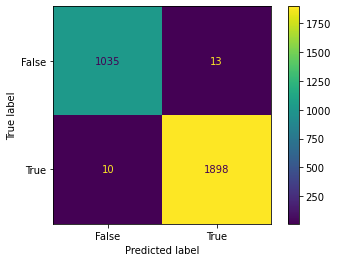

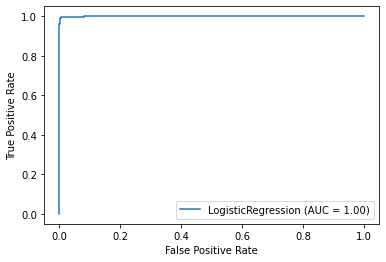

In [97]:
evaluate(logreg,X_train_sc,X_test_sc,y_train,y_test)

## Model 2: Decision Tree

In [ ]:
tree = DecisionTreeClassifier(random_state = 42,max_depth = 5)

tree.fit(X_train_sc,y_train_sc)

In [ ]:
evaluate(tree,X_train,X_test,y_train,y_test)